# Analyse over Wijn
- Stan Meyberg (TICT-AI-V2A-19)
- Roeland Oostdam (TICT-AI-V2A-19)
- Ruben Klinkenberg (TICT-AI-V2A-19)


## onderzoeksvragen
1. In hoeverre is de score van een Portugese Red te voorspellen op basis van de chemische kenmerken?  
2. In hoeverre speelt de prijs een rol in de beoordeling van de wijn?
3. In hoeverre kan op basis van de chemische kenmerken voorspelt worden of het een witte of rode wijn is?
4. Welke kernwoorden zijn typerend voor een hoog scorende wijn?  

Wij zullen deze onderzoeksvragen zo goed mogelijk proberen te beantwoorden.
Voor de beantwoording van deze vragen maken wij gebruik van het Data Science proces.  
Dit proces ziet er als volgt uit:
### Het data science proces
1. Data collection
2. Data processing
3. Data cleaning
4. Data exploration & analysis
5. Model building
6. Visualization
7. Communication


Allereerst zullen we de benodigde libraries importeren.
Deze libraries zullen we gebruiken voor het analyseren en het visualiseren van de data.

In [1]:
# data analysis libraries 
import numpy as np
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


## Data Collection
De eerste dataset die we gaan gebruiken is aan ons aangeleverd. De dataset is een csv bestand en heet: 'redwine.csv'. In de dataset staat informatie en chemische kenmerken van wijnen in Portugal. 

Allereerst beginnen we met het importeren van de dataset en kijken we of de dataset correct is geïmporteerd door de eerste 5 regels op te vragen.

In [2]:
# import the data files
df_red_wine = pd.read_csv("data/redwine.csv", sep=";")
df_red_wine.head()

,id,country,description,designation,points,price,province,taster_name,title,variety,...,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Kerin O’Keefe,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,...,0.29,0.4,2.9,0.098,10.0,26.0,10.006,3.48,0.91,9.7
1,2,Portugal,"From an estate in the south of the Alentejo, t...",Grande Reserva Tinto,91,26.0,Alentejano,Roger Voss,Casa Santa Vitória 2013 Grande Reserva Tinto R...,Portuguese Red,...,0.26,0.37,1.4,0.076,8.0,23.0,0.9974,3.26,0.70,9.6
2,3,Portugal,A year in wood and 30 months in bottle before ...,Montes Claros Garrafeira,90,28.0,Alentejo,Paul Gregutt,Adega Cooperativa de Borba 2012 Montes Claros ...,Portuguese Red,...,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
3,4,Portugal,Wood aging gives this ripe blend of Baga and T...,NaN,90,20.0,Beira Atlantico,Alexander Peartree,Quinta de Foz de Arouce 2013 Red (Beira Atlant...,Portuguese Red,...,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
4,5,Portugal,"A powerful wine, richly structured and full of...",Gerações Colheita Seleccionada,92,34.0,Alentejano,Paul Gregutt,Herdade Grande 2010 Gerações Colheita Seleccio...,Portuguese Red,...,0.48,0.34,2.2,0.073,16.0,25.0,0.9936,3.28,0.66,12.4


### externe dataset
Aangezien onze eerste dataset alleen maar kenmerken van rode wijn bevat zijn wij gaan zoeken naar een dataset met kenmerken van witte wijn.  
  
De dataset komt van de volgende website: https://archive.ics.uci.edu/ml/datasets/wine+quality  
  
Ook deze dataset gaan we importeren om hierna te controleren of hij goed geïmporteerd is.

In [3]:
df_white_wine = pd.read_csv("data/winequality-white.csv", sep=";")
df_white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Data Processing
Aangezien de bestanden met de data al in een csv bestand staan kunnen deze direct in een dataframe worden ingelezen.  
Nu is het nog aan ons om te beslissen of er nog kolomnamen zijn die aangepast moeten worden en welke kolommen we gaan droppen.  
In totaal heeft deze dataset 22 kolommen. Om uit te zoeken welke kolommen essentieel zijn voor het verdere proces gaan we nu eerste kijken hoe de kolommen heten.

In [4]:
df_red_wine.columns

Index(['id', 'country', 'description', 'designation', 'points', 'price',
       'province', 'taster_name', 'title', 'variety', 'winery',
       'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

Om goed te kunnen begrijpen met welke data we hier mee te maken hebben is hieronder voor iedere kolom de betekenis van de data die erin staat gegeven.  

- **id**  
    Een uniek nummer voor iedere rij.
- **Country**  
    Het land waar de wijn vandaan komt.
- **Description**  
    De beschrijving van de wijn.
- **Designation**  
    De wijngaard waar tenminste 85% van de druiven vandaan komen.
- **Points**  
    De hoeveelheid punten die de wijn heeft gekregen van de proever.
- **Price**  
    De prijs van de wijn.
- **Province**  
    De provincie waar de wijn.
- **Taster_name**  
    De volledige naam van de proever.
- **Title**  
    De titel die normaliter op het wijnetiket staat.
- **Variety**  
    Het type druif dat gebruikt wordt.
- **Winery**  
    Het bedrijf waar de wijn geproduceerd is.
- **Fixed acidity**  
    Zuren zijn zeer belangrijke bestanddelen van wijn en voegen zeer veel toe aan de smaak. Hoe hoger de hoeveelheid zuren des te zuurder de wijn wordt.
- **Volatile acidity**  
    De hoeveelheid azijnzuur in de wijn. Kan leiden tot een azijnachtige smaak als het in te grote hoeveelheden aanwezig is.
- **Citric acid**  
    Een zuur die gebruikt kan worden als natuurlijk conserveermiddel. Citroenzuur kan bijdragen aan de frisheid en smaak van de wijn.
- **Residual sugar**  
    De hoeveelheid suiker die over is na de fermentatie van de wijn. De hoeveelheid suiker in de wijn geeft de type van de wijn aan (droog, halfdroog, zoet).
- **Chlorides**  
    De hoeveelheid zout in de wijn.
- **Free sulfur dioxide**  
    De hoeveelheid zwaveldioxide dat vrij in de wijn zit. (Wat dus niet gebonden is aan andere chemicaliën in de wijn).
    Het zwaveldioxide voorkomt oxidatie van de wijn en wordt als conserveringsmiddel in veel levensmiddelen gebruikt.
    Zwaveldioxide wat niet vrij is, en dus al gebonden is aan andere stoffen in de wijn, heeft geen antioxiderende werking meer.
- **Total sulfur dioxide**  
    De totale hoeveelheid zwaveldioxide dat in de wijn zit.  
    Een te hoge concentratie zwaveldioxide kan de smaak verpesten.
    Een te lage concentratie zwaveldioxide kan ervoor zorgen dat er teveel bacteriën in de wijn blijven zitten waardoor het gevaarlijk kan zijn om te drinken.
- **Density**  
    De dichtheid van de wijn. De dichtheid kan verminderen door toevoeging van meer alcohol.
- **pH**  
    Is een maat voor de zuurgraad van een waterige oplossing. De schaal gaat van 0 (zuur) tot 14 (basisch). De meeste wijnen zitten tussen de 2.8 en de 4.0.
- **Sulphates (sulfites)**  
    Een additief die bijdraagt aan het vermeerderen van het gas zwaveldioxide.
- **Alcohol**  
    Het percentage alcohol in de wijn.

Voor het uitzoeken van de betekenis van deze termen/kolommen zijn de volgende bronnen gebruikt:  
- https://www.gall.nl/ontdek/wijn/de-zuurgraad-van-wijn/
- https://winecompliancealliance.com/vinyard-designation-on-a-wine-label/
- https://wineserver.ucdavis.edu/industry-info/enology/methods-and-techniques/common-chemical-reagents/citric-acid
- https://waterhouse.ucdavis.edu/whats-in-wine/volatile-acidity
- http://rstudio-pubs-static.s3.amazonaws.com/80458_5000e31f84df449099a872ccf40747b7.html


Bij deze dataset hebben we al de voorkennis dat al deze wijnen uit Portugal komen. Hierdoor hoeven we de kolom 'country' niet te gebruiken. Verder geeft 'variety' aan met wat voor druif we te maken hebben, waarschijnlijk zal dit ook maar één unieke waarde hebben.  
Voordat we deze kolommen weggooien checken we nog voor de zekerheid of onze aannames kloppen. 

In [5]:
df_red_wine['country'].unique()

array(['Portugal'], dtype=object)

In [6]:
df_red_wine['variety'].unique()

array(['Portuguese Red'], dtype=object)

Onze aannames blijken te kloppen. We hebben hier twee keer te maken met een kolom met maar één unieke waarde. Deze kolommen kunnen dus gedropt worden.

In [7]:
df_red_wine.drop(['country', 'variety'], axis=1, inplace=True)

Op basis van onze onderzoeksvragen kunnen we ook de kolommen 'Designation', 'winery' en 'Province' laten vallen. Dit omdat we voor de beantwoording van onze onderzoeksvragen geen onderscheid hoeven te maken tussen de verschillende provincies of de wijngaarden waar de wijn vandaan kan komen.

In [8]:
df_red_wine.drop(['designation', 'province', 'winery'], axis=1, inplace=True)

Verder maken we van de kolom 'id' de index

In [9]:
df_red_wine.set_index('id', inplace=True)
df_red_wine.head()

,description,points,price,taster_name,title,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
id,,,,,,,,,,,,,,,,
1,"This is ripe and fruity, a wine that is smooth...",87,15.0,Kerin O’Keefe,Quinta dos Avidagos 2011 Avidagos Red (Douro),10.0,0.29,0.4,2.9,0.098,10.0,26.0,10.006,3.48,0.91,9.7
2,"From an estate in the south of the Alentejo, t...",91,26.0,Roger Voss,Casa Santa Vitória 2013 Grande Reserva Tinto R...,8.3,0.26,0.37,1.4,0.076,8.0,23.0,0.9974,3.26,0.70,9.6
3,A year in wood and 30 months in bottle before ...,90,28.0,Paul Gregutt,Adega Cooperativa de Borba 2012 Montes Claros ...,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
4,Wood aging gives this ripe blend of Baga and T...,90,20.0,Alexander Peartree,Quinta de Foz de Arouce 2013 Red (Beira Atlant...,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
5,"A powerful wine, richly structured and full of...",92,34.0,Paul Gregutt,Herdade Grande 2010 Gerações Colheita Seleccio...,8.0,0.48,0.34,2.2,0.073,16.0,25.0,0.9936,3.28,0.66,12.4


## Data cleaning
Nu de data bewerkt is kunnen we tot de volgende stap overgaan: het opschonen van de data. Hierbij gaan we op zoek naar missende en dubbele waarden, outliers en onvolkomenheden.  
Allereerst gaan we opzoek naar rijen waar waarden missen.

In [10]:
len(df_red_wine)

2465

In [11]:
pd.isnull(df_red_wine).sum()

description               0
points                    0
price                   269
taster_name               0
title                     0
fixed acidity             0
volatile acidity          0
citric acid               0
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
dtype: int64

Hier zien we dat er 269 missende waarden zijn en dat die waarden zich allemaal in de 'price' kolom bevinden. Deze waarde hebben we echter wel voor één van de onderzoeksvragen. Hier hebben wij de afweging gemaakt om deze waarden te verwijderen.  
Deze keuze is gebaseerd op het feit dat we nu ongeveer 12% van de data weggooien en we dus nog genoeg data behouden om te onderzoeken of er een relatie zit tussen de prijs en de hoeveelheid punten van een fles wijn.  
We droppen dus alle rijen met missende waardes en tegelijkertijd verwijderen we duplicate rijen.

In [12]:
# deleting the rows with empty values
df_red_wine.dropna(inplace=True)
# deleting the duplicates rows
df_red_wine.drop_duplicates(inplace=True)

Nu moeten we nog checken of elke kolom de geschikte datatype heeft.

In [13]:
df_red_wine.dtypes

description              object
points                    int64
price                   float64
taster_name              object
title                    object
fixed acidity           float64
volatile acidity        float64
citric acid              object
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                  object
pH                      float64
sulphates               float64
alcohol                  object
dtype: object

In de bovenstaande tabel valt te zien dat de kolom 'density', 'citric acid' en 'alcohol' niet de gewenste datatypen hebben. We willen hier floats hebben terwijl ze nu aangegeven worden als Strings.  
Om dit op te lossen gaan we over de kolommen heen en zetten iedere String om tot een float. Wanneer dit niet kan omdat de waarde dit niet toelaat wordt er een NaN ingevuld.

In [14]:
df_red_wine['citric acid'] = pd.to_numeric(df_red_wine['citric acid'], errors='coerce')
df_red_wine['density'] = pd.to_numeric(df_red_wine['density'], errors='coerce')
df_red_wine['alcohol'] = pd.to_numeric(df_red_wine['alcohol'], errors='coerce')

pd.isnull(df_red_wine).sum()

description               0
points                    0
price                     0
taster_name               0
title                     0
fixed acidity             0
volatile acidity          0
citric acid             183
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   1
pH                        0
sulphates                 0
alcohol                  10
dtype: int64

In de bovenstaande tabel valt te lezen dat in totaal 194 waarden zijn omgezet tot NaN. Deze waardes kunnen we nu automatisch vullen door te interpoleren. Deze keuze hebben we gemaakt omdat we op zoek zijn naar bepaalde kenmerken en door te interpoleren blijven deze unieke kenmerken tussen de waardes die ze uniek maakt.

In [15]:
df_red_wine.interpolate(inplace=True)
pd.isnull(df_red_wine).sum()

description             0
points                  0
price                   0
taster_name             0
title                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

## Data Exploration

### De wijnproevers
Aangezien we met wijnproevers te maken hebben is alle data over de punten die aan een wijn toegedeeld zijn subjectief. Allereerst willen we dus wat inzicht krijgen over het gedrag van deze groep bij de toekenning van de punten.  
  
Eerst gaan we kijken met hoeveel wijnproevers we in totaal te maken hebben.

In [16]:
len(df_red_wine['taster_name'].unique())

18

We hebben dus met 18 verschillende wijnproevers te maken.  
Hierna gaan we kijken of de hoeveelheid gegeven beoordelingen van de wijnproevers gelijk verdeeld zijn.

In [17]:
df_red_wine['taster_name'].value_counts()

Roger Voss            572
Michael Schachner     334
Kerin O’Keefe         231
Paul Gregutt          199
Virginie Boone        191
Joe Czerwinski        127
Matt Kettmann         123
Sean P. Sullivan      107
Jim Gordon             97
Anna Lee C. Iijima     74
Anne Krebiehl MW       49
Lauren Buzzeo          34
Susan Kostrzewa        25
Alexander Peartree     14
Jeff Jenssen            9
Mike DeSimone           4
Carrie Dykes            3
Fiona Adams             3
Name: taster_name, dtype: int64

In de bovenstaande tabel valt te zien dat deze verdeling niet echt gelijk verdeeld is.  
Om deze data nog iets overzichtelijker te maken zetten we deze tabel om tot een grafiek.

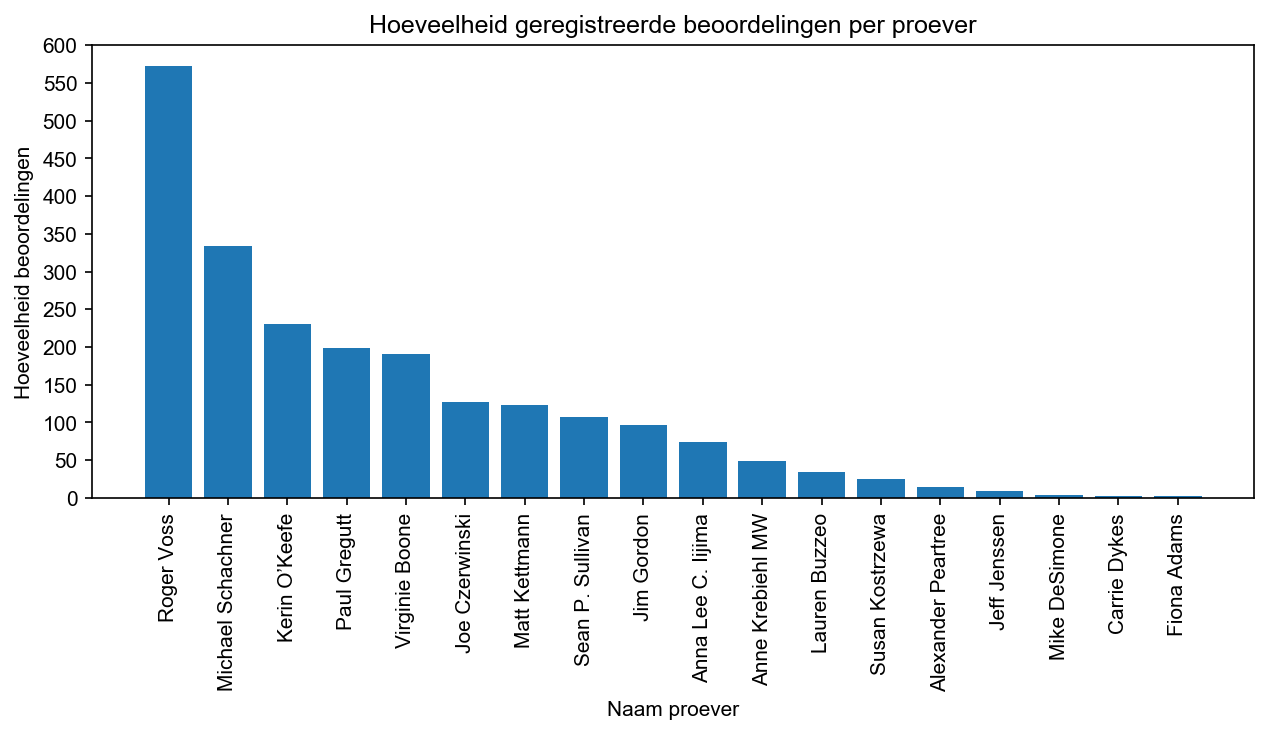

In [18]:
# selecting the data
df_tasting_freq = df_red_wine['taster_name'].value_counts()

# parsing the data
fig, ax = plt.subplots(figsize=(10,4), dpi=150)
ax.bar(df_tasting_freq.index, df_tasting_freq, width= 0.8)

# setting the axis
plt.xticks(rotation=90)
plt.yticks([n for n in range(0, 650, 50)])

# setting the style, labels and title
plt.xlabel('Naam proever')
plt.ylabel('Hoeveelheid beoordelingen')
plt.title('Hoeveelheid geregistreerde beoordelingen per proever')
sns.set_style("whitegrid")

# printing the plot
plt.show()

De aannames die de tabel aanwakkeren worden door de grafiek bevestigd. Uit de grafiek valt nog beter te zien dat de hoeveelheid beoordelingen per proever zeer onevenredig verdeeld zijn. Sommige proevers hebben zeer veel beoordelingen gegeven terwijl andere proevers veel minder hebben gegeven.  
  
Hierna willen we graag weten wat de minimale, maximale en gemiddelde score is per proever.

In [19]:
# prepare the data_frame
df_taster_index = df_red_wine.copy()
df_taster_index = df_taster_index[['taster_name', 'points']]
df_taster_index.set_index('taster_name', inplace=True)

# getting the min, max and average per taster
taster_avg = df_taster_index.groupby('taster_name').mean()
taster_min = np.min(df_taster_index.groupby('taster_name'))
taster_max = np.max(df_taster_index.groupby('taster_name'))

# building a new dataframe with all the info per taster
df_taster_stats = pd.concat([taster_min, taster_max, taster_avg], axis=1)
df_taster_stats.columns = ['min points', 'max points', 'avg points']
df_taster_stats.sort_values(['avg points'])

,min points,max points,avg points
taster_name,,,
Carrie Dykes,83,88,85.333333
Jeff Jenssen,82,92,87.111111
Anne Krebiehl MW,83,94,88.020408
Alexander Peartree,82,95,88.500000
Joe Czerwinski,84,94,88.637795
Fiona Adams,85,91,88.666667
Jim Gordon,82,95,88.701031
Sean P. Sullivan,84,95,88.757009
Lauren Buzzeo,82,93,88.764706


Uit deze tabel valt te lezen dat het gemiddeld aantal punten ongeveer rond de 88 punten zal liggen. Om nog iets meer duidelijkheid te creeëren rondom de puntenverdeling zullen we de gegeven punten in een grafiek plotten.

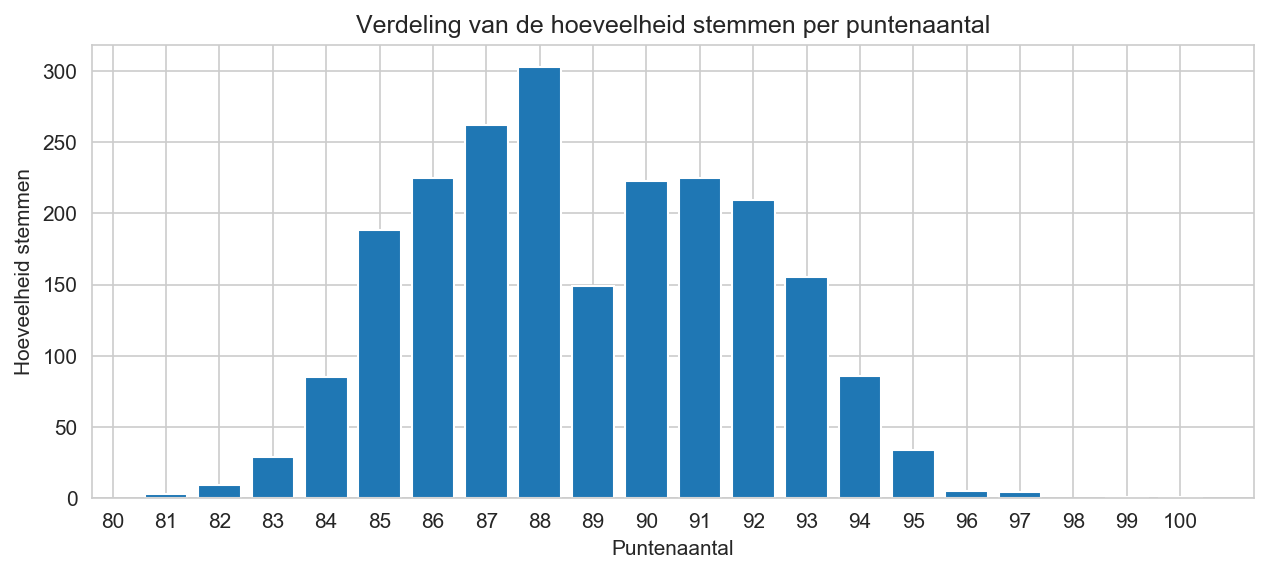

In [20]:
# selecting the data
data = df_red_wine['points'].value_counts().sort_index()

# parsing the data
fix, ax = plt.subplots(figsize=(10,4), dpi=150)
ax.bar(data.index, data)

# setting the axis
plt.xticks([n for n in range(80, 101, 1)])

# setting the style, labels and title
plt.xlabel('Puntenaantal')
plt.ylabel('Hoeveelheid stemmen')
plt.title('Verdeling van de hoeveelheid stemmen per puntenaantal')
sns.set_style("whitegrid")

# printing the plot
plt.show()


Zoals in de grafiek te zien is valt zal het gemiddelde ongeveer rond de 88 liggen. Verder is de modus ook 88. Het interessante van deze grafiek is het feit dat zo rond 89 punten een kleine dip is. Dit kan ook mede komen door de aangeleverde data.

### Prijs analyse
Om wat meer informatie te vergaren over de prijzen is het bevorderlijk om de verdeling van de prijzen te plotten.

### Chemische kenmerken
Ook qua chemische kenmerken hebben willen we graag wat analyses doen over de dataset. Deze analyses kunnen we dan hopelijk gebruiken bij het selecteren van de variabelen om de twee soorten wijnen te klassificeren.  
  
Allereerst vragen we de algemene statistieken op over alle chemische kenmerken.

In [21]:
df_red_wine.describe()

,points,price,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000
mean,88.864299,24.819217,8.347040,0.530089,0.295362,2.575592,0.087842,15.953097,47.468124,2.273421,3.311557,0.663201,10.423065
std,2.997764,25.539475,1.751835,0.179942,0.182491,1.438245,0.047686,10.446069,33.304164,9.770103,0.155462,0.174591,1.054974
min,81.000000,5.000000,4.600000,0.120000,0.010000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.500000
25%,87.000000,12.000000,7.100000,0.400000,0.140000,1.900000,0.070000,7.750000,22.000000,0.995680,3.210000,0.550000,9.500000
50%,88.000000,17.000000,7.900000,0.520000,0.280000,2.200000,0.079000,14.000000,38.000000,0.996800,3.310000,0.620000,10.200000
75%,91.000000,28.000000,9.300000,0.640000,0.440000,2.600000,0.090000,21.250000,64.000000,0.997900,3.400000,0.730000,11.100000
max,100.000000,450.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,100.369000,4.010000,2.000000,14.900000


Op het eerste gezicht zeggen deze waardes nog niet zoveel. Pas wanneer we de kolommen met de minimale, maximale en gemiddelde waarden van alle kenmerken met van de witte en rode wijn zullen (hopelijk) deze waardes veel meer zeggen. 
  
Dus gaan we nu voor alle chemische kenmerken de minimale, maximale en gemiddelde waardes van witte en rode wijn met elkaar vergelijken.

## onderzoeksvraag 1

## onderzoeksvraag 2

## onderzoeksvraag 3

In [22]:
df_red_wine.insert(0,'category',0)
df_white_wine.insert(0,'category',1)

In [23]:
df_all = pd.merge(df_red_wine,df_white_wine,how='outer',copy=False)
df_all.drop(['description','points','price','taster_name','title','quality'],axis=1,inplace=True)
df_all.head()

,category,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,10.0,0.29,0.40,2.9,0.098,10.0,26.0,10.0060,3.48,0.91,9.7
1,0,8.3,0.26,0.37,1.4,0.076,8.0,23.0,0.9974,3.26,0.70,9.6
2,0,8.3,0.26,0.37,1.4,0.076,8.0,23.0,0.9974,3.26,0.70,9.6
3,0,8.3,0.26,0.37,1.4,0.076,8.0,23.0,0.9974,3.26,0.70,9.6
4,0,8.3,0.26,0.37,1.4,0.076,8.0,23.0,0.9974,3.26,0.70,9.6


In [31]:
df_all.where(df_all['category']==1).mean()

category                  1.000000
fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
dtype: float64

In [32]:
df_all.where(df_all['category']==0).mean()

category                 0.000000
fixed acidity            8.347040
volatile acidity         0.530089
citric acid              0.295362
residual sugar           2.575592
chlorides                0.087842
free sulfur dioxide     15.953097
total sulfur dioxide    47.468124
density                  2.273421
pH                       3.311557
sulphates                0.663201
alcohol                 10.423065
dtype: float64

In [79]:
for column in df_all.columns:
    c = stats.pearsonr(df_all['category'],df_all[column])
    if(c[0]>0.5 or c[0]<-0.5):
        print("\033[92m",column,c[0])
    else:
        print("\x1b[31m",column,c[0])

 category 1.0
 fixed acidity -0.4982592678080364
 volatile acidity -0.6657262228108688
 citric acid 0.12465975057901761
 residual sugar 0.38036107469962943
 chlorides -0.5177039645284822
 free sulfur dioxide 0.5053724952075023
 total sulfur dioxide 0.7253921240828821
 density -0.10819584690200514
 pH -0.3503604901930476
 sulphates -0.5084457262373042
 alcohol 0.03574287986820609


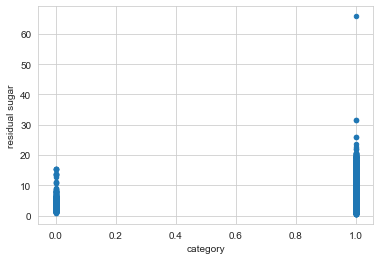

In [28]:
# df_all.plot.scatter(x='category',y='residual sugar')

In [25]:
# from sklearn.cluster import KMeans
# wineMeans = KMeans()

## onderzoeksvraag 4